In [1]:
import numpy as np
import math
from matplotlib import pylab as plt
# from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
# from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
# from root_pandas import read_root
# import uproot
import time

In [3]:
df5e = pd.read_pickle("electron5x5.pkl")
print("read")
df5g = pd.read_pickle("../PhS2_5x5/Gamma5x5.pkl")
print("read")
df10e = pd.read_pickle("electron10x10.pkl")
print("read")
df10g = pd.read_pickle("../PhS2_10x10/Gamma10x10.pkl")
print("read")
df20e = pd.read_pickle("electron20x20.pkl")
print("read")
df20g = pd.read_pickle("../PhS2_20x20/Gamma20x20.pkl")
print("read")

read
read
read
read
read
read


In [10]:
df5e

,X,Y,dX,dY,Weight,Ekine
0,7.390625,-0.467041,0.700195,0.396729,0.000400,0.055756
1,13.757812,-17.531250,0.079468,-0.686523,0.000400,0.186523
2,23.281250,5.566406,0.132568,-0.247070,0.000400,0.176758
3,19.875000,-23.421875,0.391846,-0.149780,0.000400,0.051941
4,-50.218750,-6.253906,-0.570312,0.168823,0.000008,0.631348
...,...,...,...,...,...,...
3162272,-2.847656,12.664062,-0.257080,0.237915,0.000008,1.044922
3162273,38.968750,4.367188,0.239990,0.195557,0.000008,0.910156
3162274,47.718750,2.541016,0.327148,0.055481,0.000008,1.312500
3162275,2.173828,2.523438,0.018173,-0.345215,0.000400,0.921387


plot
plot
plot
plot
plot
plot


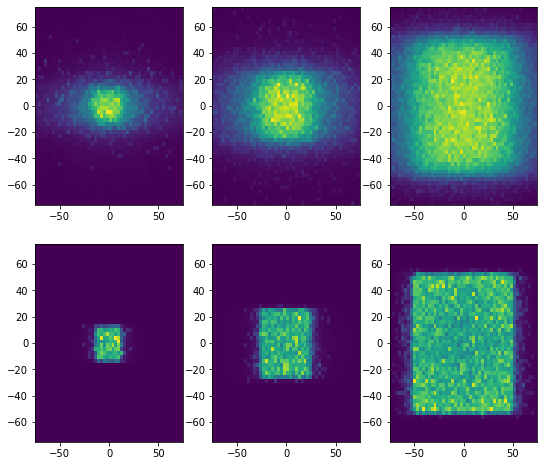

In [15]:
fig,ax=plt.subplots(2,3,figsize=(9,8))
_=ax[0,0].hist2d(df5e['X'],df5e['Y'],bins=(50,50),weights=df5e["Weight"])
print("plot")
_=ax[1,0].hist2d(df5g['X'],df5g['Y'],bins=(50,50),weights=df5g["Weight"])
print("plot")
_=ax[0,1].hist2d(df10e['X'],df10e['Y'],bins=(50,50),weights=df10e["Weight"])
print("plot")
_=ax[1,1].hist2d(df10g['X'],df10g['Y'],bins=(50,50),weights=df10g["Weight"])
print("plot")
_=ax[0,2].hist2d(df20e['X'],df20e['Y'],bins=(50,50),weights=df20e["Weight"])
print("plot")
_=ax[1,2].hist2d(df20g['X'],df20g['Y'],bins=(50,50),weights=df20g["Weight"])
print("plot")

plot1
plot2
plot3
plot4
plot5
plot6


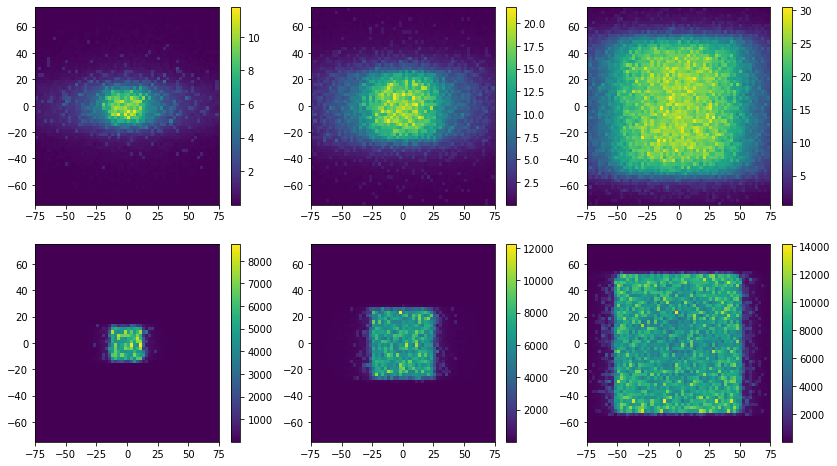

In [34]:
fig,ax=plt.subplots(2,3,figsize=(14,8))
hist5e=ax[0,0].hist2d(df5e['X'],df5e['Y'],bins=(60,60),weights=df5e["Weight"])
fig.colorbar(mappable=hist5e[3], ax=ax[0,0]) 
print("plot1")

hist5g=ax[1,0].hist2d(df5g['X'],df5g['Y'],bins=(60,60),weights=df5g["Weight"])
fig.colorbar(mappable=hist5g[3], ax=ax[1,0]) 

print("plot2")
hist10e=ax[0,1].hist2d(df10e['X'],df10e['Y'],bins=(60,60),weights=df10e["Weight"])
fig.colorbar(mappable=hist10e[3], ax=ax[0,1]) 

print("plot3")
hist10g=ax[1,1].hist2d(df10g['X'],df10g['Y'],bins=(60,60),weights=df10g["Weight"])
fig.colorbar(mappable=hist10g[3], ax=ax[1,1]) 

print("plot4")
hist20e=ax[0,2].hist2d(df20e['X'],df20e['Y'],bins=(60,60),weights=df20e["Weight"])
fig.colorbar(mappable=hist20e[3], ax=ax[0,2]) 

print("plot5")
hist20g=ax[1,2].hist2d(df20g['X'],df20g['Y'],bins=(60,60),weights=df20g["Weight"])
fig.colorbar(mappable=hist20g[3], ax=ax[1,2]) 

print("plot6")


In [49]:
hist5e=np.array(hist5e[0])


In [63]:
hist10e=np.array(hist10e[0])
hist20e=np.array(hist20e[0])


In [64]:

hist5e.shape

(60, 60)

Text(0.5, 0, 'X (cm)')

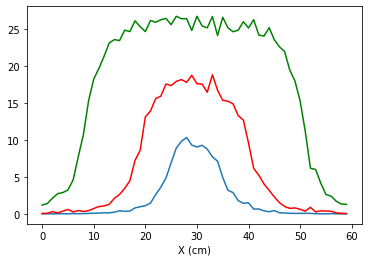

In [109]:
plt.plot(hist5e[28:33,:].mean(axis=0))
plt.plot(hist10e[28:33,:].mean(axis=0),color="red")
plt.plot(hist20e[28:33,:].mean(axis=0),color="green")
plt.xlabel("X (cm)")

In [68]:
hist5g=np.array(hist5g[0])
hist10g=np.array(hist10g[0])
hist20g=np.array(hist20g[0])

(array([16.,  0.,  2.,  0.,  0.,  0.,  3., 11., 21.,  7.]),
 array([  13.29976196,  932.3698573 , 1851.43995263, 2770.51004797,
        3689.5801433 , 4608.65023863, 5527.72033397, 6446.7904293 ,
        7365.86052464, 8284.93061997, 9204.0007153 ]),
 <a list of 10 Patch objects>)

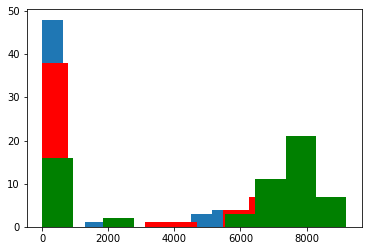

In [154]:
plt.hist(hist5g[28:33,:].mean(axis=0))
plt.hist(hist10g[28:33,:].mean(axis=0),color="red")
plt.hist(hist20g[28:33,:].mean(axis=0),color="green")

In [70]:
hist5govere=hist5g/hist5e

In [71]:
hist10govere=hist10g/hist10e
hist20govere=hist20g/hist20e

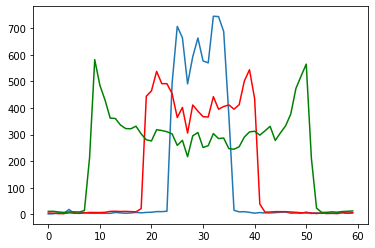

In [72]:
plt.plot(hist5govere[28:33,:].mean(axis=0))
plt.plot(hist10govere[28:33,:].mean(axis=0),color="red")
plt.plot(hist20govere[28:33,:].mean(axis=0),color="green")

In [108]:
df5e['dZ']=pow(1.0-df5e['dX']*df5e['dX']-df5e['dY']*df5e['dY'],0.5)
df10e['dZ']=pow(1.0-df10e['dX']*df10e['dX']-df10e['dY']*df10e['dY'],0.5)
df20e['dZ']=pow(1.0-df20e['dX']*df20e['dX']-df20e['dY']*df20e['dY'],0.5)
df5g['dZ']=pow(1.0-df5g['dX']*df5g['dX']-df5g['dY']*df5g['dY'],0.5)
df10g['dZ']=pow(1.0-df10g['dX']*df10g['dX']-df10g['dY']*df10g['dY'],0.5)
df20g['dZ']=pow(1.0-df20g['dX']*df20g['dX']-df20g['dY']*df20g['dY'],0.5)

In [ ]:
dfe['dXdY']=(dfe.dX**2+dfe.dY**2)**0.5
dfg['dXdY']=(dfg.dX**2+dfg.dY**2)**0.5
df_2e['dXdY']=(df_2e.dX**2+df_2e.dY**2)**0.5
df_2g['dXdY']=(df_2g.dX**2+df_2g.dY**2)**0.5

In [148]:
# ratioThetaXYe=dfe.dXdY/dfe.dZ
# ratioThetaXe=df5e.dX/df5e.dZ
# ratioThetaYe=dfe.dX/dfe.dZ

# ratioThetaXYg=dfg.dXdY/dfg.dZ
# ratioThetaXg=dfg.dX/dfg.dZ
# ratioThetaYg=dfg.dX/dfg.dZ

# ratioThetaXY_2e=df_2e.dXdY/df_2e.dZ
# ratioThetaX_2e=df_2e.dX/df_2e.dZ
# ratioThetaY_2e=df_2e.dX/df_2e.dZ

# ratioThetaXY_2g=df_2g.dXdY/df_2g.dZ
# ratioThetaX_2g=df_2g.dX/df_2g.dZ
# ratioThetaY_2g=df_2g.dX/df_2g.dZ


ratioThetaX5e=df5e.dX/df5e.dZ
ratioThetaX10e=df10e.dX/df10e.dZ
ratioThetaX20e=df20e.dX/df20e.dZ

ratioThetaY5e=df5e.dY/df5e.dZ
ratioThetaY10e=df10e.dY/df10e.dZ
ratioThetaY20e=df20e.dY/df20e.dZ

In [149]:
# dfe['thetaXY']=ratioThetaXYe.apply(math.atan)*180/3.14
# dfe['thetaX']=ratioThetaXe.apply(math.atan)*180/3.14
# dfe['thetaY']=ratioThetaYe.apply(math.atan)*180/3.14

# dfg['thetaXY']=ratioThetaXYg.apply(math.atan)*180/3.14
# dfg['thetaX']=ratioThetaXg.apply(math.atan)*180/3.14
# dfg['thetaY']=ratioThetaYg.apply(math.atan)*180/3.14

# df_2e['thetaXY']=ratioThetaXY_2e.apply(math.atan)*180/3.14
# df_2e['thetaX']=ratioThetaX_2e.apply(math.atan)*180/3.14
# df_2e['thetaY']=ratioThetaY_2e.apply(math.atan)*180/3.14

# df_2g['thetaXY']=ratioThetaXY_2g.apply(math.atan)*180/3.14
# df_2g['thetaX']=ratioThetaX_2g.apply(math.atan)*180/3.14
# df_2g['thetaY']=ratioThetaY_2g.apply(math.atan)*180/3.14

df5e['thetaX']=ratioThetaX5e.apply(math.atan)*180/3.14
df10e['thetaX']=ratioThetaX10e.apply(math.atan)*180/3.14
df20e['thetaX']=ratioThetaX20e.apply(math.atan)*180/3.14
df5e['thetaY']=ratioThetaY5e.apply(math.atan)*180/3.14
df10e['thetaY']=ratioThetaY10e.apply(math.atan)*180/3.14
df20e['thetaY']=ratioThetaY20e.apply(math.atan)*180/3.14

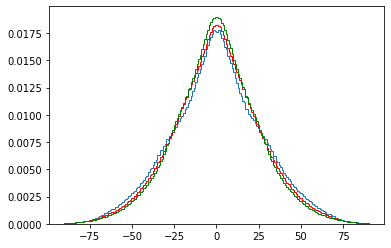

In [150]:
_=plt.hist(df5e['thetaX'],bins=200,histtype=u'step',density=True)
_=plt.hist(df10e['thetaX'],bins=200,histtype=u'step',color='red',density=True)
_=plt.hist(df20e['thetaX'],bins=200,histtype=u'step',color='green',density=True)

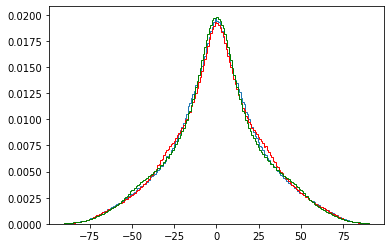

In [151]:
_=plt.hist(df5e['thetaY'],bins=200,histtype=u'step',density=True)
_=plt.hist(df10e['thetaY'],bins=200,histtype=u'step',color='red',density=True)
_=plt.hist(df20e['thetaY'],bins=200,histtype=u'step',color='green',density=True)

Text(0.5, 0, 'X angle degrees')

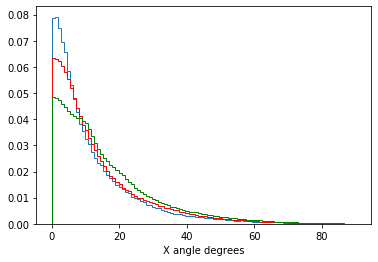

In [115]:
_=plt.hist(abs(df5e[abs(df5e['X'])<2]['thetaX']),bins=100,histtype=u'step',density=True)
_=plt.hist(abs(df10e[abs(df10e['X'])<2]['thetaX']),bins=100,histtype=u'step',color='red',density=True)
_=plt.hist(abs(df20e[abs(df20e['X'])<2]['thetaX']),bins=100,histtype=u'step',color='green',density=True)
plt.xlabel("X angle degrees")

Text(0.5, 0, 'X angle degrees')

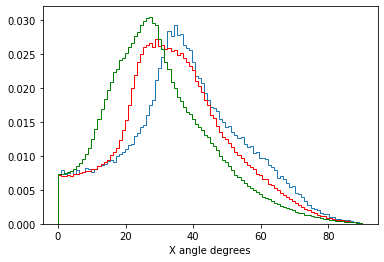

In [116]:
_=plt.hist(abs(df5e[abs(df5e['X'])>60]['thetaX']),bins=100,histtype=u'step',density=True)
_=plt.hist(abs(df10e[abs(df10e['X'])>60]['thetaX']),bins=100,histtype=u'step',color='red',density=True)
_=plt.hist(abs(df20e[abs(df20e['X'])>60]['thetaX']),bins=100,histtype=u'step',color='green',density=True)
plt.xlabel("X angle degrees")

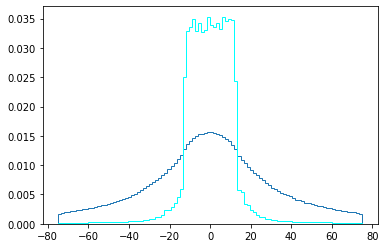

In [122]:
_=plt.hist(df5e[df5e['Y']<10]['X'],bins=100,histtype=u'step',density=True)
_=plt.hist(df5g[df5g['Y']<10]['X'],bins=100,histtype=u'step',color="cyan",density=True)


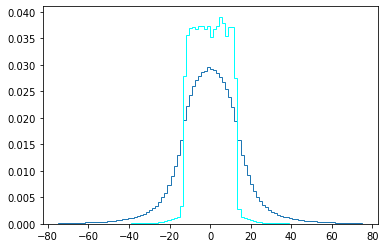

In [127]:
_=plt.hist(df5e[df5e['X']<10]['Y'],bins=100,histtype=u'step',density=True)
_=plt.hist(df5g[df5g['X']<10]['Y'],bins=100,histtype=u'step',color="cyan",density=True)



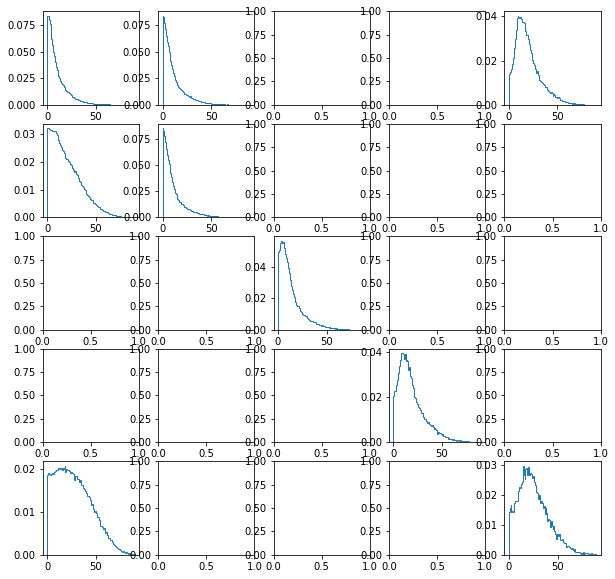

In [175]:
fig,ax=plt.subplots(5,5,figsize=(10,10))
_=ax[0,0].hist(abs(df5e[(abs(df5e['Y'])<5)&(abs(df5e['X'])<5)]['thetaX']),bins=100,histtype=u'step',density=True)
_=ax[0,1].hist(abs(df5e[(abs(df5e['Y'])<5)&(abs(df5e['X'])>5)&(abs(df5e['X'])<10)]['thetaX']),bins=100,histtype=u'step',density=True)
_=ax[0,4].hist(abs(df5e[(abs(df5e['Y'])<5)&(abs(df5e['X'])>20)&(abs(df5e['X'])<25)]['thetaX']),bins=100,histtype=u'step',density=True)

_=ax[1,0].hist(abs(df5e[(abs(df5e['Y'])>5)&(abs(df5e['X'])>5)&(abs(df5e['Y'])<10)]['thetaX']),bins=100,histtype=u'step',density=True)
_=ax[4,0].hist(abs(df5e[(abs(df5e['Y'])>20)&(abs(df5e['X'])>5)&(abs(df5e['Y'])<25)]['thetaX']),bins=100,histtype=u'step',density=True)
# _=ax[3,0].hist(abs(df5e[(abs(df5e['Y'])>15)&(abs(df5e['X'])>5)&(abs(df5e['Y'])<20)&(abs(df5e['X'])<5)]['thetaX']),bins=100,histtype=u'step',density=True)

_=ax[1,1].hist(abs(df5e[(abs(df5e['Y'])>5)&(abs(df5e['X'])>5)&(abs(df5e['Y'])<10)&(abs(df5e['X'])<10)]['thetaX']),bins=100,histtype=u'step',density=True)
_=ax[2,2].hist(abs(df5e[(abs(df5e['Y'])>10)&(abs(df5e['X'])>10)&(abs(df5e['Y'])<15)&(abs(df5e['X'])<15)]['thetaX']),bins=100,histtype=u'step',density=True)
_=ax[3,3].hist(abs(df5e[(abs(df5e['Y'])>15)&(abs(df5e['X'])>15)&(abs(df5e['Y'])<20)&(abs(df5e['X'])<20)]['thetaX']),bins=100,histtype=u'step',density=True)
_=ax[4,4].hist(abs(df5e[(abs(df5e['Y'])>20)&(abs(df5e['X'])>20)&(abs(df5e['Y'])<25)&(abs(df5e['X'])<25)]['thetaX']),bins=100,histtype=u'step',density=True)

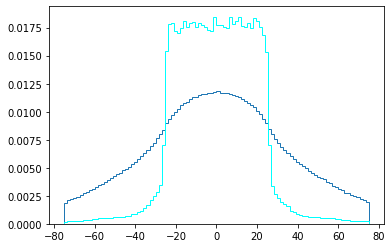

In [124]:
_=plt.hist(df10e[df10e['Y']<10]['X'],bins=100,histtype=u'step',density=True)
_=plt.hist(df10g[df10g['Y']<10]['X'],bins=100,histtype=u'step',color="cyan",density=True)

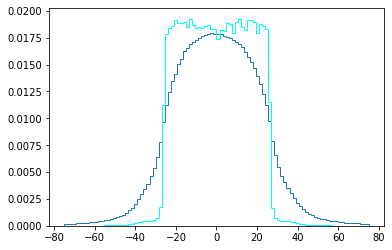

In [129]:
_=plt.hist(df10e[df10e['X']<10]['Y'],bins=100,histtype=u'step',density=True)
_=plt.hist(df10g[df10g['X']<10]['Y'],bins=100,histtype=u'step',color="cyan",density=True)

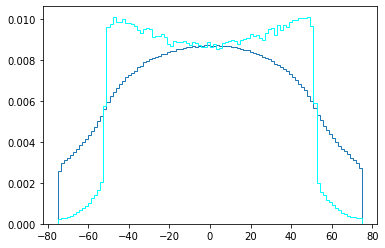

In [126]:
_=plt.hist(df20e[df20e['Y']<10]['X'],bins=100,histtype=u'step',density=True)
_=plt.hist(df20g[df20g['Y']<10]['X'],bins=100,histtype=u'step',color="cyan",density=True)

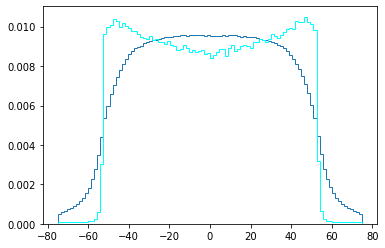

In [130]:
_=plt.hist(df20e[df20e['X']<10]['Y'],bins=100,histtype=u'step',density=True)
_=plt.hist(df20g[df20g['X']<10]['Y'],bins=100,histtype=u'step',color="cyan",density=True)

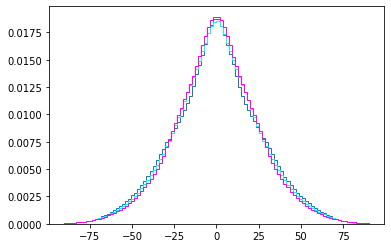

In [153]:
# plt.subplots(1,2,figsize=(8,4))
_=plt.hist(df5e[df5e['Y']<10]['thetaX'],bins=100,histtype=u'step',density=True)
_=plt.hist(df10e[df10e['Y']<10]['thetaX'],bins=100,histtype=u'step',color="cyan",density=True)
_=plt.hist(df20e[df20e['Y']<10]['thetaX'],bins=100,histtype=u'step',color="magenta",density=True)
# _=ax[1,0].hist(df5e[df5e['X']<10]['dY'],bins=100,histtype=u'step',density=True)
# _=ax[1,0].hist(df5g[df5g['X']<10]['dY'],bins=100,histtype=u'step',color="cyan",density=True)


In [ ]:
plt.subplots(2,1,figsize=(4,8))
_=ax[0,0].hist(df5e[df5e['Y']<10]['dX'],bins=100,histtype=u'step',density=True)
_=ax[0,0].hist(df5g[df5g['Y']<10]['dX'],bins=100,histtype=u'step',color="cyan",density=True)
_=ax[1,0].hist(df5e[df5e['X']<10]['dY'],bins=100,histtype=u'step',density=True)
_=ax[1,0].hist(df5g[df5g['X']<10]['dY'],bins=100,histtype=u'step',color="cyan",density=True)
